In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [17]:
trial_idx=10
paper='2004.04168'

# Code-generation prompts

In [18]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [19]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
`
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy relev

# LLM-Generated code

In [20]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let me work through
Let me work through this problem step-by-step to develop the HartreeFockHamiltonian class for the given Hamiltonian.

First, let's understand the Hamiltonian:

1. $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$ - This is the dispersion relation for particles with spin $s$.
2. $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k)  c_s(k)$ - This is the kinetic energy term.
3. $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$ - This is the Hartree term.
4. $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$ - This is the Fock term.
5. $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$ - This is the Fourier transform of the interaction potential.

Now, let's answer the questions.

QUESTION 1: Dimension and Basis Order
Looking at the Hamiltonian, 

In [21]:
print(generated_code['thinking'])

Let me work through this problem step-by-step to develop the HartreeFockHamiltonian class for the given Hamiltonian.

First, let's understand the Hamiltonian:

1. $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$ - This is the dispersion relation for particles with spin $s$.
2. $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k)  c_s(k)$ - This is the kinetic energy term.
3. $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$ - This is the Hartree term.
4. $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$ - This is the Fock term.
5. $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$ - This is the Fourier transform of the interaction potential.

Now, let's answer the questions.

QUESTION 1: Dimension and Basis Order
Looking at the Hamiltonian, we see that the operators are labeled by spin $s$ or $s'$. There are no o

In [22]:
print(generated_code['text'])

Based on the given Hamiltonian equation, I'll develop the HartreeFockHamiltonian class for a triangular lattice. Let me analyze the components first.

# ANSWER:

1) Number of Flavors, D = (2,)
Basis Order:
0: spin. Order: up (0), down (1)

2) EXP-VAL DEPENDENT TERMS: {
   "⟨c_s^†(k1) c_s(k1)⟩": "Expectation value of density for spin s at k1, exp_val[s, s, k1]",
   "⟨c_s^†(k1) c_s'(k1)⟩": "Expectation value of coherence between spin s and s' at k1, exp_val[s, s', k1]"
}

TERMS:
- E_s(k) c_s^†(k) c_s(k) → H[s, s, k], NI (Kinetic term)
- (1/N) U(0) ⟨c_s^†(k1) c_s(k1)⟩ c_s'^†(k2) c_s'(k2) → H[s', s', k2], I (Hartree term)
- -(1/N) U(k1-k2) ⟨c_s^†(k1) c_s'(k1)⟩ c_s'^†(k2) c_s(k2) → H[s', s, k2], I (Fock term)

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a spin system on a triangular lattice.
    
    Args:
        N_shell (int): Number of shells in the Brillouin zone.
        parameters

In [23]:
code = utils_auto.extract_code(generated_code['text'])

In [24]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a spin system on a triangular lattice.
    
    Args:
        N_shell (int): Number of shells in the Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float, optional): Filling factor. Defaults to 0.5.
    """
    def __init__(self, N_shell: int=5, parameters: dict={'t0': 1.0, 't1': 0.1, 'U0': 1.0, 'U1': 0.5, 'a': 1.0}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2,)  # Only spin flavor (up, down)
        self.basis_order = {'0': 'spin'}  # Order for spin: up (0), down (1)
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = 0  # Temperature is 0 as specified in the problem
        self.a = parameters.get('a', 1.0)  # Lattice constant
        self.primitive_vectors = self.a * np.array([[1, 0], [0.5, np.sqrt(3)/2]])  # 

In [25]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_10.py


# Code evaluation

In [26]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [27]:
import importlib

In [28]:
module = importlib.import_module(code_path)

In [29]:
import HF

## Check k-space

In [30]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

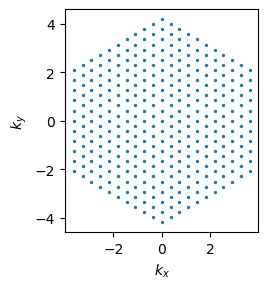

In [31]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Check energy dispersion for non-interacting term

In [32]:
t0 = "t0" if hasattr(ham,'t0') else 't_0'
t1 = "t1" if hasattr(ham,'t1') else 't_1'
U0 = "U0" if hasattr(ham,'U0') else 'U_0'
U1 = "U1" if hasattr(ham,'U1') else 'U_1'

In [33]:
ham = module.HartreeFockHamiltonian(N_shell=10,)
setattr(ham,t1,1.0)
setattr(ham,t0,0)

In [34]:
h_nonint = ham.generate_non_interacting()

In [35]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

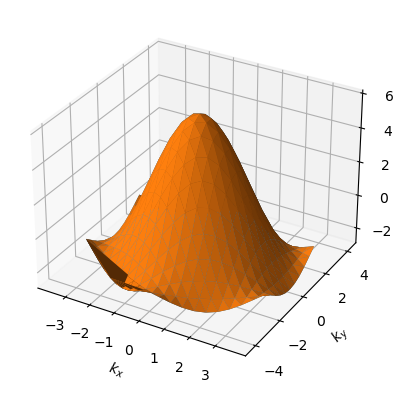

In [36]:
utils_auto.plot_2d_bandstructure(ham,en)

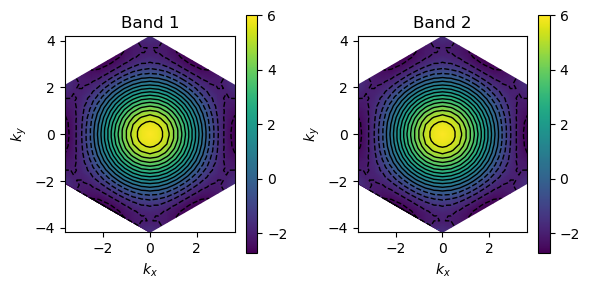

In [37]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Infinitesemial U limit

In [38]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e-5)
setattr(ham_int,U1,0)

In [39]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [40]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


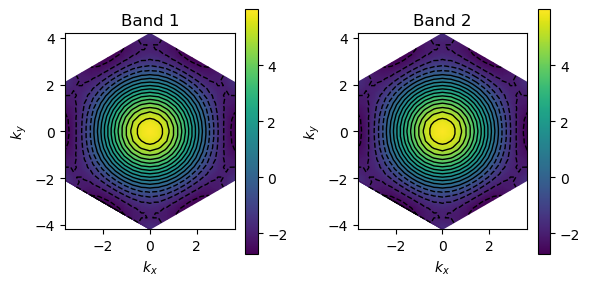

In [41]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Large U limit

In [42]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e5)
setattr(ham_int,U1,0)

In [43]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [44]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 1


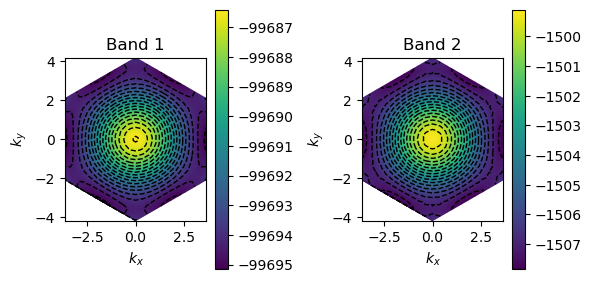

In [45]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [46]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is 98178.58
U/T is 24548.43
mean_U is 24999.09


# Auto eval

## Task 1

In [47]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper='2004.04168')
    )


#################### THINKING ####################

Let me break down
Let me break down the problem and the rubric to determine if the image shows a correct momentum space mesh for a triangular lattice.

First, I need to check what the image is showing. The image displays a hexagonal arrangement of points in k-space (momentum space), with kx on the x-axis ranging from approximately -3 to 3, and ky on the y-axis ranging from approximately -4 to 4. 

The rubric asks me to check:
1. Whether this represents the first Brillouin zone of the concerned problem
2. Whether the point group symmetry is correct

For a triangular lattice:
- The real space lattice is triangular with 6-fold rotational symmetry
- The reciprocal lattice (k-space) is also triangular
- The first Brillouin zone of a triangular lattice is a hexagon, which is what we see in the image

Looking at the image:
- The arrangement of k-points forms a hexagonal shape, which is the correct shape for the first Brillouin zone of a tri

In [48]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [49]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper='2004.04168')
    )


#################### THINKING ####################

Let me analyze the
Let me analyze the band structure plots in this image according to the rubric provided:

1. Brillouin Zone Shape:
   The plots show a hexagonal boundary, which is indeed the expected Brillouin zone shape for a triangular lattice. The first Brillouin zone of a triangular lattice should be a regular hexagon, which is what we see in both Band 1 and Band 2 plots.

2. Symmetry of the Energy Distribution:

   2.1 Highest Energy Regions (Yellow):
   In both bands, the highest energy region (yellow) is at the center of the Brillouin zone (around k_x = 0, k_y = 0).

   2.2 Pattern of Energy Variation:
   The energy decreases radially outward from the center, forming concentric contours that maintain hexagonal symmetry as they approach the zone boundary.

   2.3 Rotational Symmetries:
   The energy distribution appears to have 6-fold rotational symmetry (C6), meaning it remains unchanged after rotation by 60° (or 2π/6 radian

In [50]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [51]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper='2004.04168')
    )


#################### THINKING ####################

Alright,
Alright, I'm looking at the image showing two panels labeled "Band 1" and "Band 2". Each shows a false color plot of the band structure in the first Brillouin zone. Let me analyze this according to the rubric:

1. **Shape of the Brillouin zone**:
   I can see that the boundary of the plots is hexagonal, which is indeed the correct shape for the first Brillouin zone of a triangular lattice. This matches expectations.

2. **Symmetry of the energy distribution**:

   2.1 **Highest energy regions**: The highest energy regions (yellow) appear to be concentrated at the center of both Band 1 and Band 2 plots.

   2.2 **Pattern of energy variation**: The energy decreases radially outward from the center in concentric contours, going from yellow (highest) in the center to purple (lowest) at the edges.

   2.3 **Rotational symmetries**: Looking at the contour patterns, they appear to have 6-fold rotational symmetry (D6), as expected f

In [52]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [53]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper='2004.04168',U_int=1e5)
    )


#################### THINKING ####################

I
I need to evaluate the band structure plots provided in the image according to the rubric. Let me analyze it step by step:

1. First, identify the shape of the Brillouin zone boundary:
   - Looking at the plots, I can see that both Band 1 and Band 2 are displayed within hexagonal boundaries. This is consistent with the Brillouin zone of a triangular lattice, which should be hexagonal. So this matches what's expected.

2. Examining the symmetry of the energy distribution:
   
   2.1 Highest energy regions (yellow):
   - In both plots, the highest energy regions (yellow) are in the center of the hexagons.
   
   2.2 Pattern of energy variation:
   - The energy varies radially from the center (yellow/highest energy) to the edges (purple/lowest energy) in both bands.
   - This creates a circular or symmetric pattern where the energy decreases uniformly in all directions from the center.
   
   2.3 Rotational symmetries present:
   - Th

In [54]:
answer4=utils_auto.extract_result_content(result4['text'])

In [55]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '10' saved to final_answer.yaml
